In [1]:
# imports 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score, mean_squared_error, confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('C:\\Users\\etiem\\Downloads\\Employee_Attrition_Data_set(1).csv')
data.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [4]:
# Checking for more nulls
data.isnull().sum()

Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

In [5]:
data.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


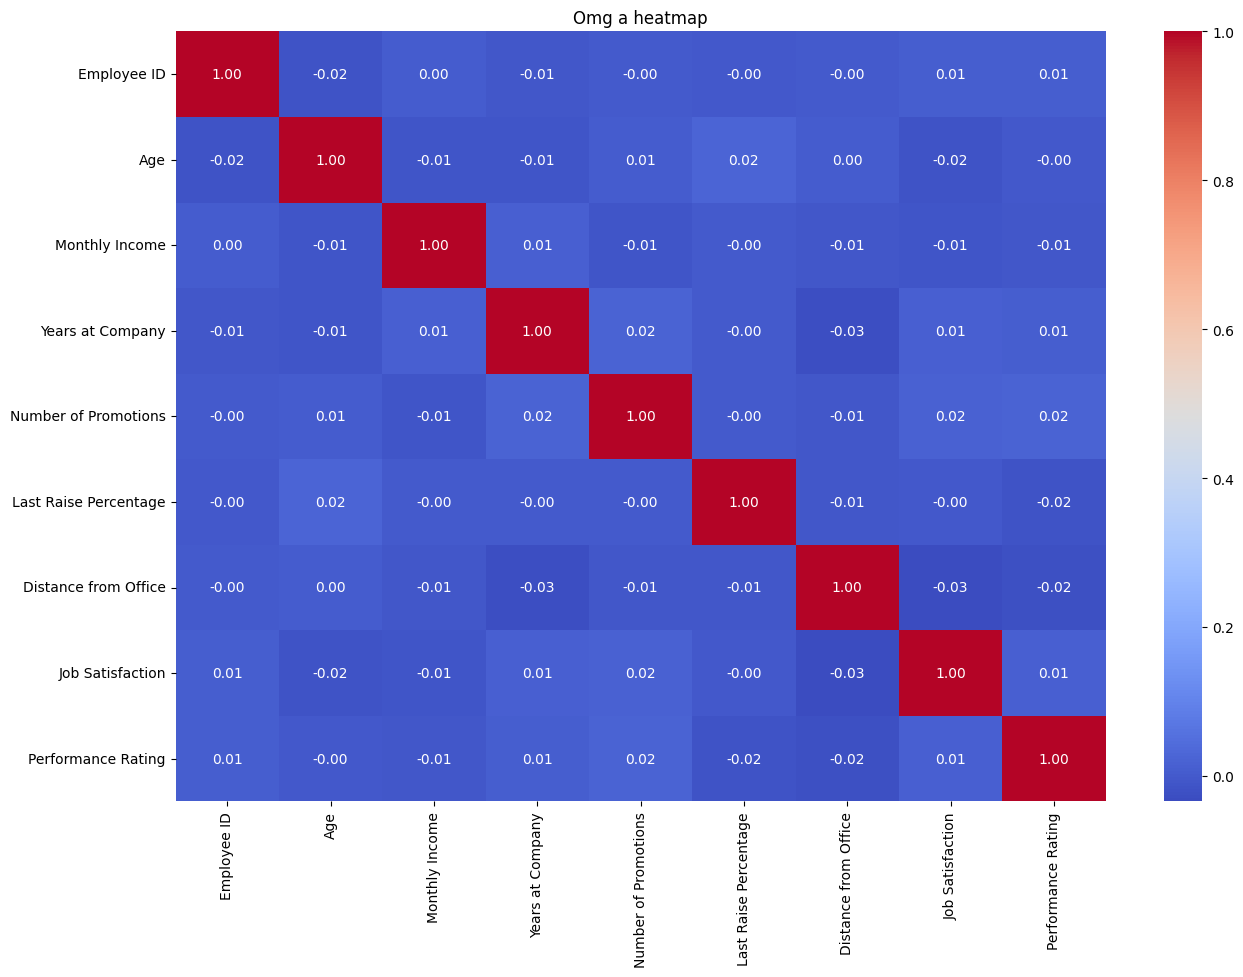

In [6]:
# Select only the numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Generate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Omg a heatmap")
plt.show()

<Axes: xlabel='Age', ylabel='Employee ID'>

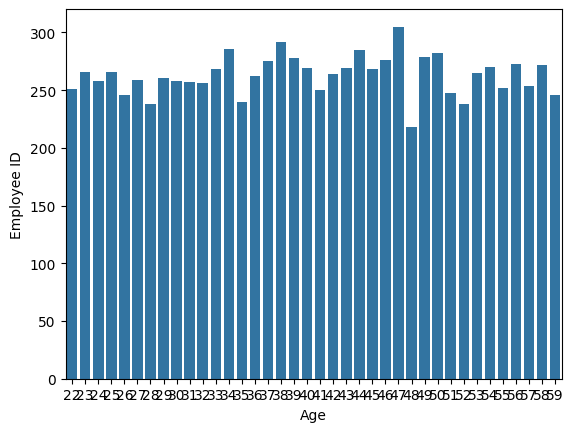

In [7]:
loc= data.groupby('Age')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())

<Axes: xlabel='Gender', ylabel='Employee ID'>

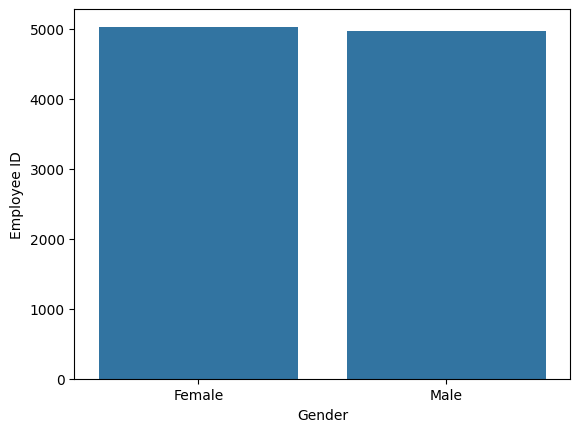

In [9]:
loc= data.groupby('Gender')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())

<Axes: xlabel='Job Role', ylabel='Employee ID'>

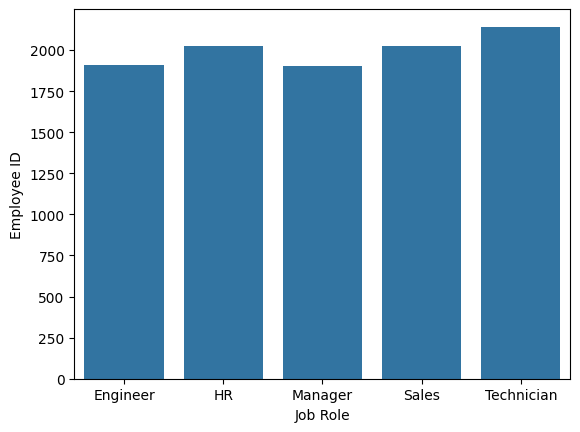

In [10]:
loc= data.groupby('Job Role')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())

<Axes: xlabel='Department', ylabel='Employee ID'>

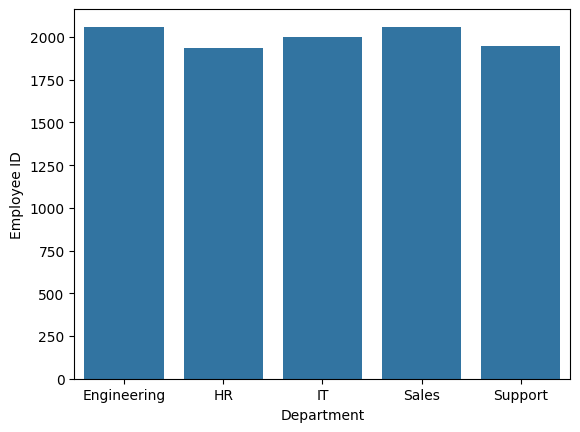

In [16]:
loc= data.groupby('Department')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())

<Axes: xlabel='Attrition', ylabel='Employee ID'>

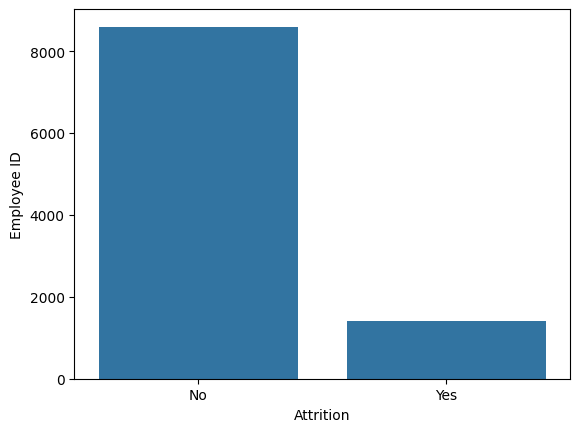

In [13]:
loc= data.groupby('Attrition')
sns.barplot(x=loc['Employee ID'].count().index, y=loc['Employee ID'].count())

<Axes: ylabel='Monthly Income'>

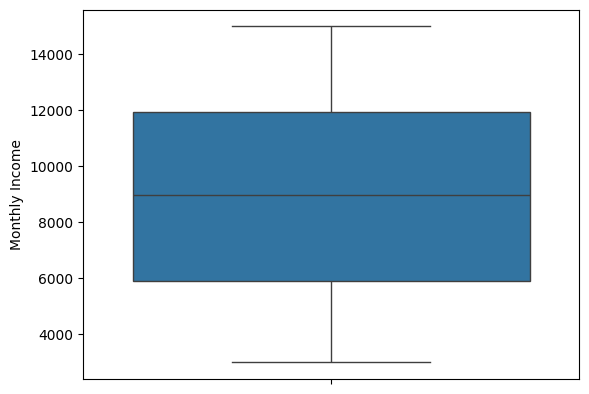

In [17]:
sns.boxplot(y=data['Monthly Income'])

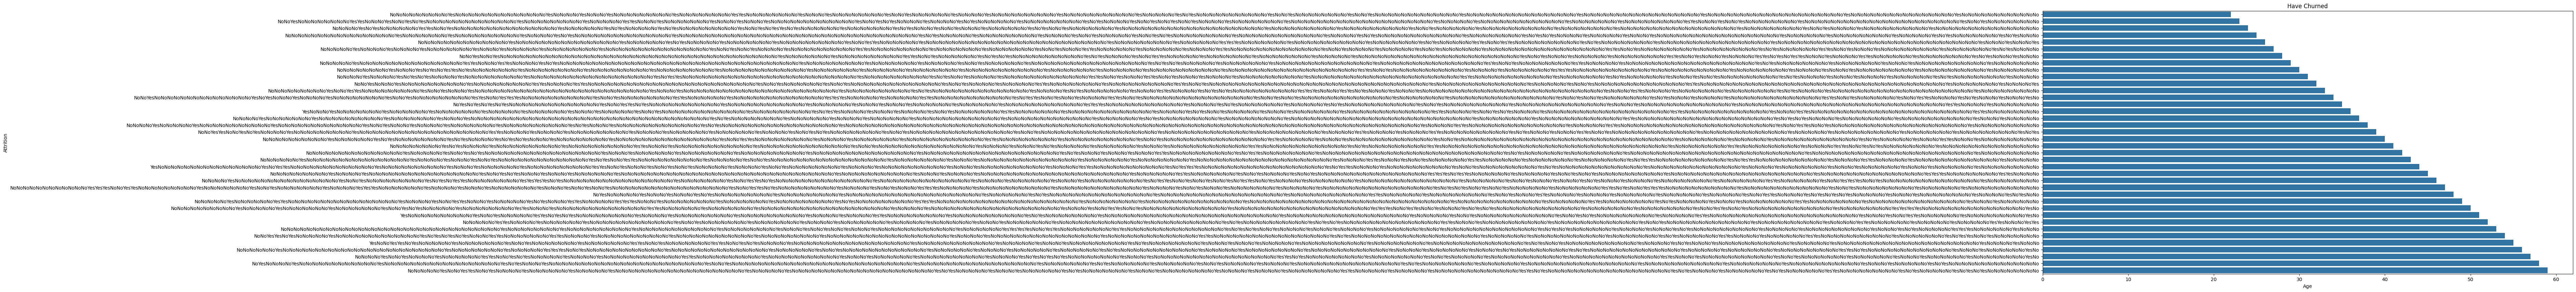

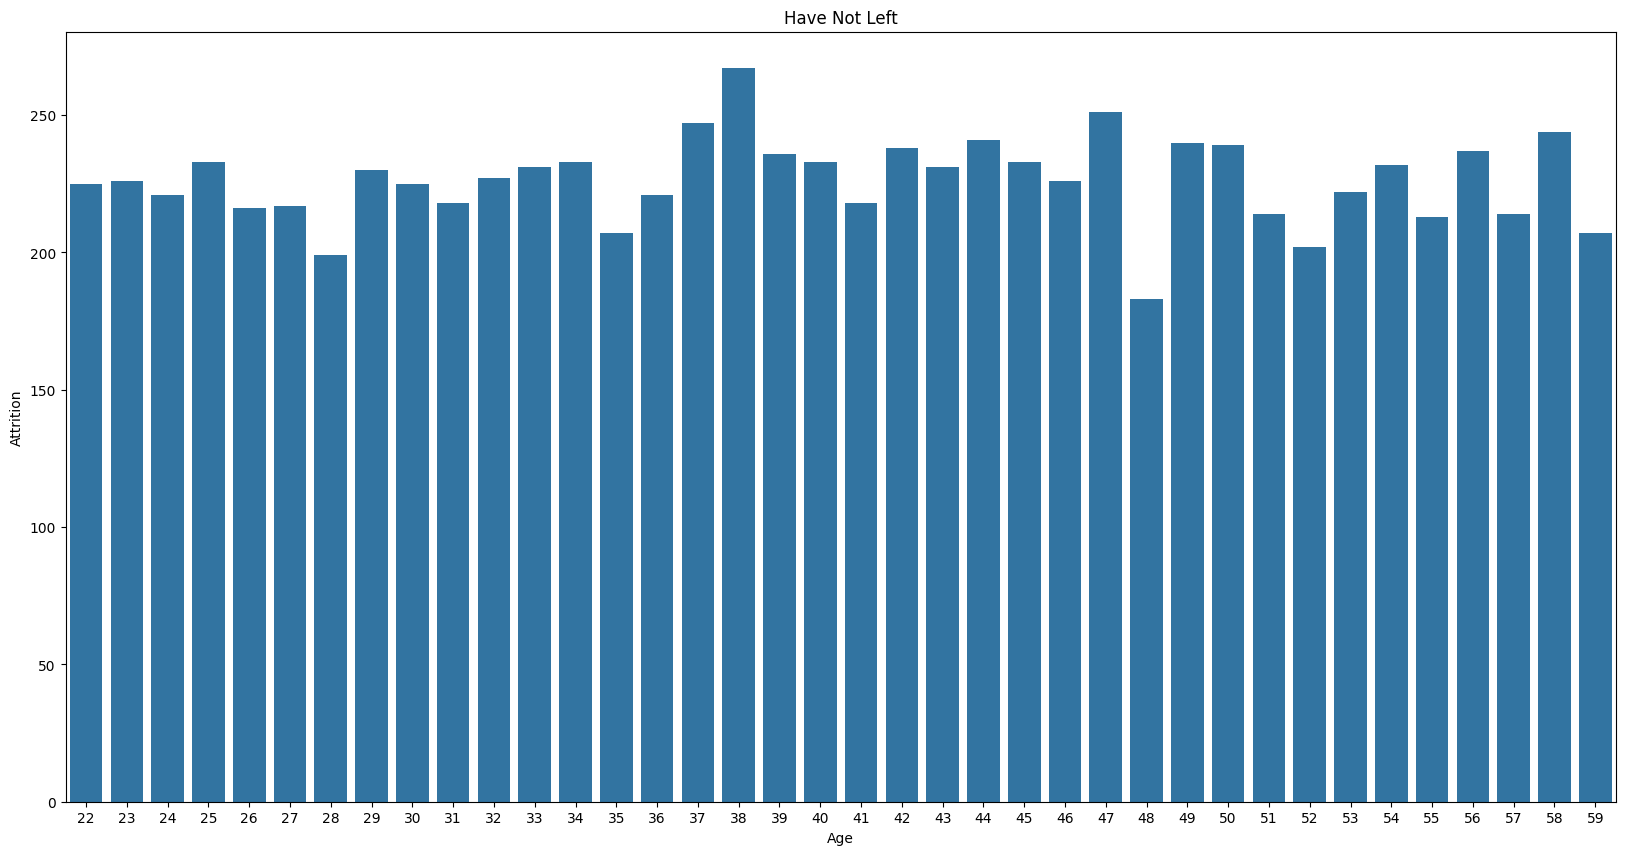

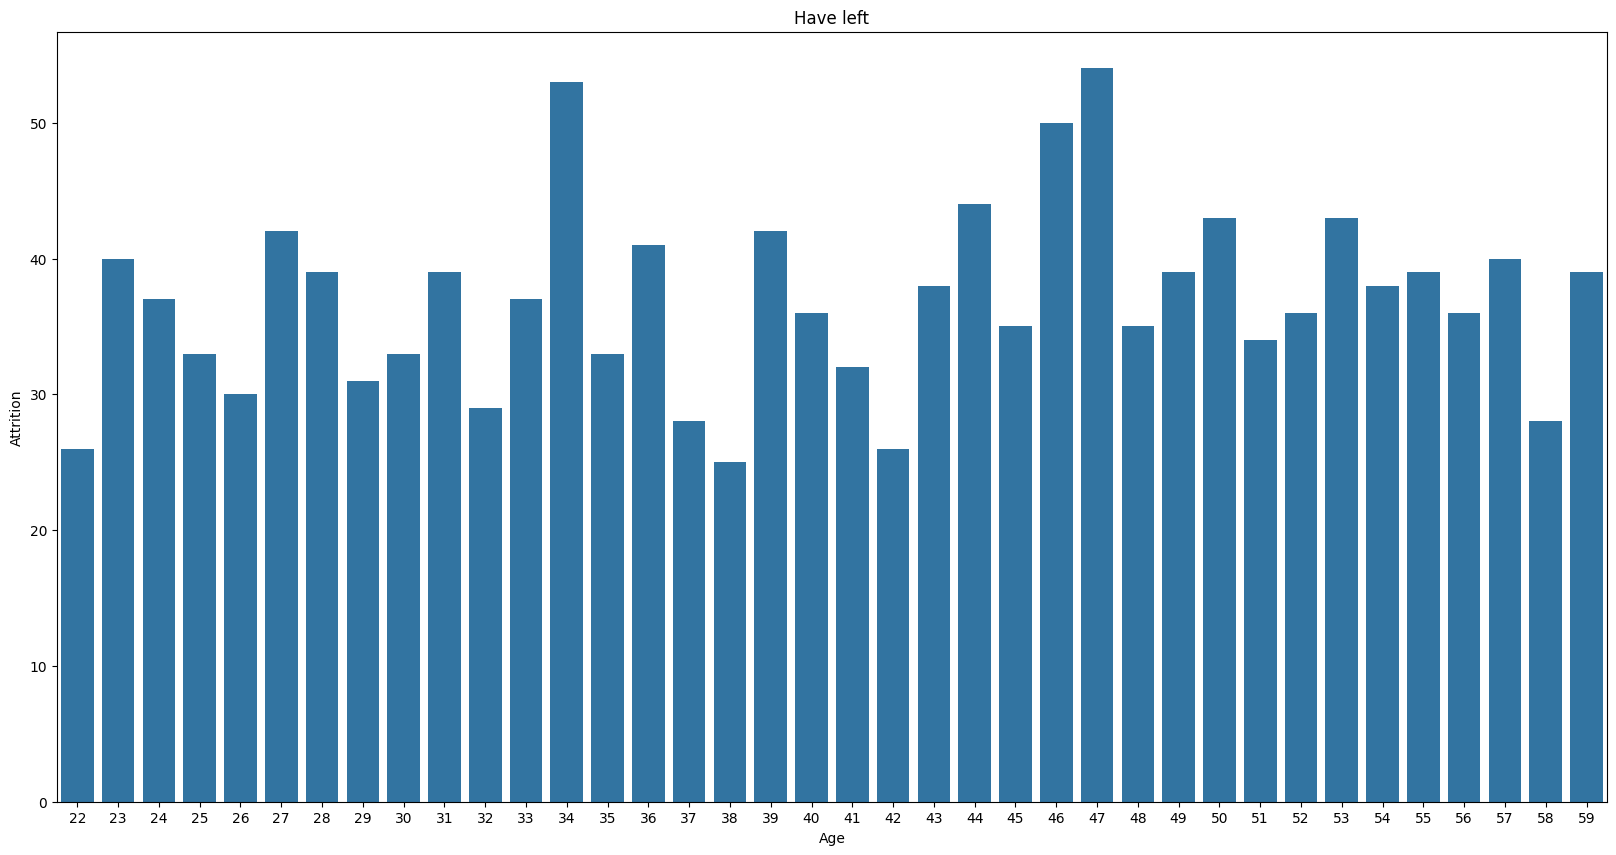

In [20]:
# group by age
ages = data.groupby('Age')

# generate bar plot for how many customers have churned per age
# Note: Using count instead of sum would be incorrect, count will just return the number of people at that age
# Assuming has churned is represented as 1, then the sum of the churn column represents how many customers have churned at that age
plt.figure(figsize=(20,10))
sns.barplot(x=ages['Attrition'].sum().index, y=ages['Attrition'].sum())
plt.title("Have Churned")
plt.show()

# check for people who have not churned
noChurn = data[data['Attrition'] == 'No']
noChurnAge = noChurn.groupby('Age')
# using count here since sum of all who have not churned would be 0
plt.figure(figsize=(20,10))
sns.barplot(x=noChurnAge['Attrition'].count().index, y=noChurnAge['Attrition'].count())
plt.title("Have Not Left")
plt.show()

# check for people who have not churned
noChurn = data[data['Attrition'] == 'Yes']
noChurnAge = noChurn.groupby('Age')
# using count here since sum of all who have not churned would be 0
plt.figure(figsize=(20,10))
sns.barplot(x=noChurnAge['Attrition'].count().index, y=noChurnAge['Attrition'].count())
plt.title("Have left")
plt.show()

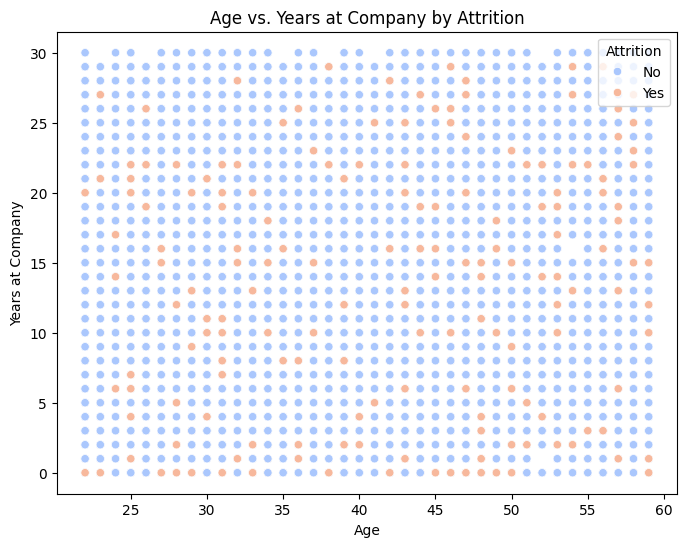

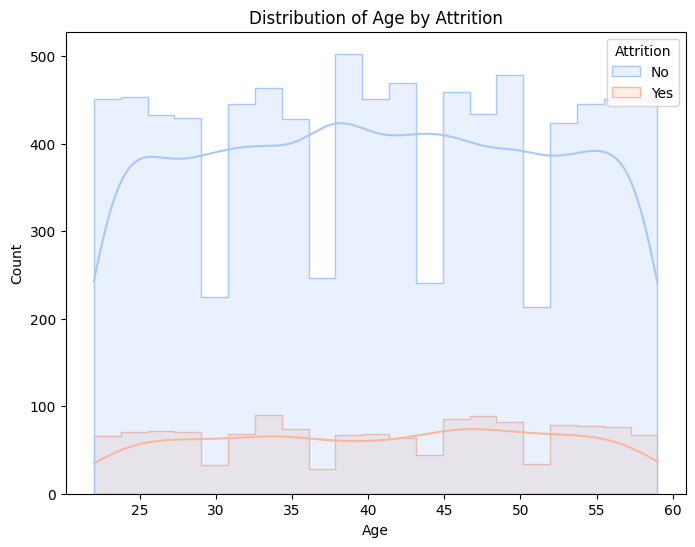

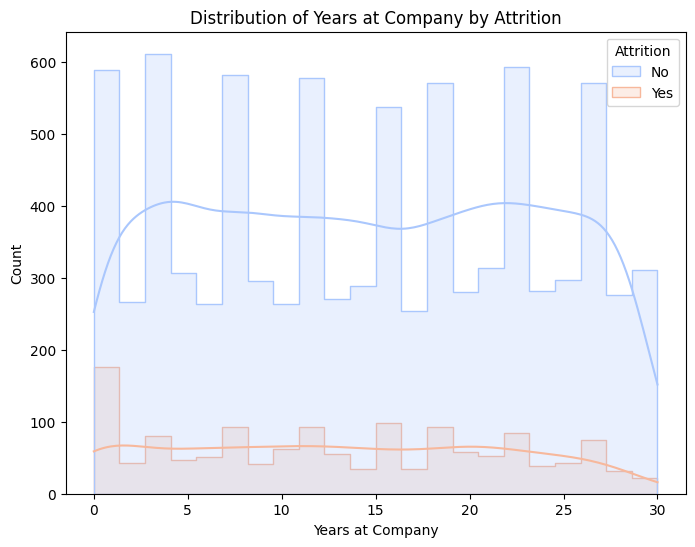

In [22]:
# Scatter plot for Age vs. Years at Company
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Years at Company', hue='Attrition', palette='coolwarm')
plt.title('Age vs. Years at Company by Attrition')
plt.show()

# Distribution plots for Age and Years at Company
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Attrition', kde=True, palette='coolwarm', element='step')
plt.title('Distribution of Age by Attrition')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Years at Company', hue='Attrition', kde=True, palette='coolwarm', element='step')
plt.title('Distribution of Years at Company by Attrition')
plt.show()


C:\Users\etiem\AppData\Local\Temp\ipykernel_21264\2858039696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='Job Satisfaction', palette='coolwarm')


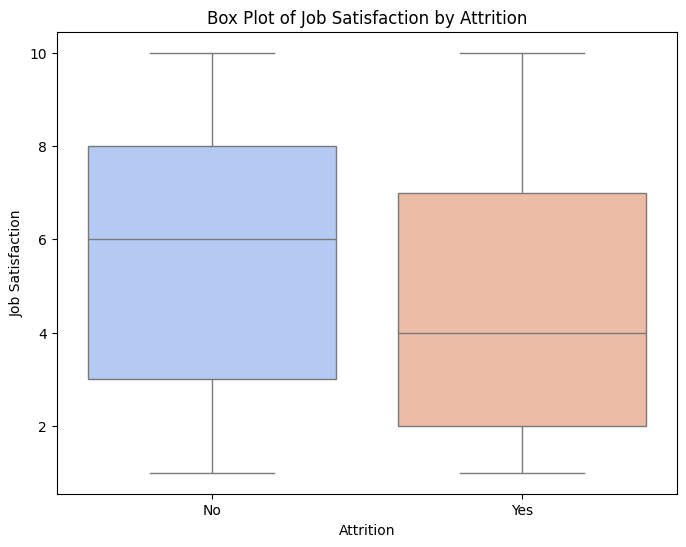

C:\Users\etiem\AppData\Local\Temp\ipykernel_21264\2858039696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='Distance from Office', palette='coolwarm')


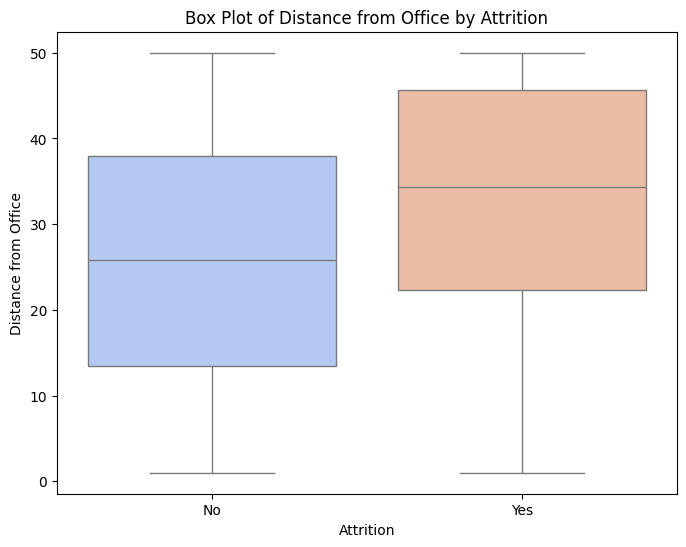

In [25]:
# Box plot for Job Satisfaction by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='Job Satisfaction', palette='coolwarm')
plt.title('Box Plot of Job Satisfaction by Attrition')
plt.show()

# Box plot for Distance from Office by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='Distance from Office', palette='coolwarm')
plt.title('Box Plot of Distance from Office by Attrition')
plt.show()


C:\Users\etiem\AppData\Local\Temp\ipykernel_21264\2525786782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='Monthly Income', palette='coolwarm')


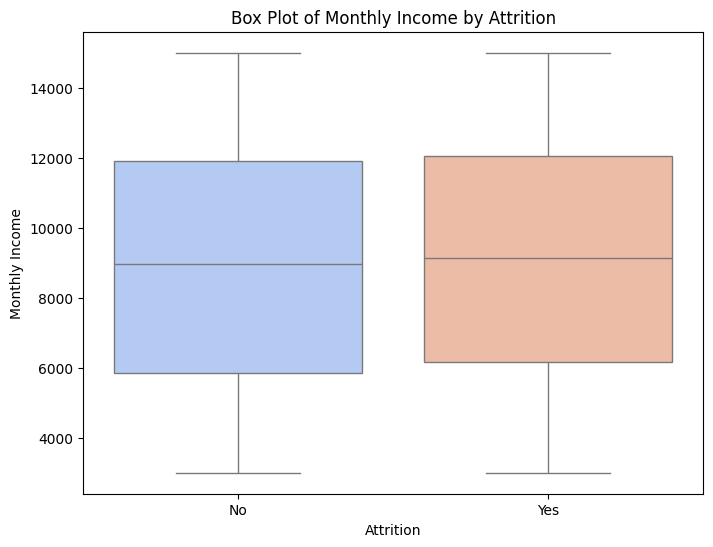

In [27]:
# Box plot for Job Satisfaction by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='Monthly Income', palette='coolwarm')
plt.title('Box Plot of Monthly Income by Attrition')
plt.show()

C:\Users\etiem\AppData\Local\Temp\ipykernel_21264\2701364160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='Years at Company', palette='coolwarm')


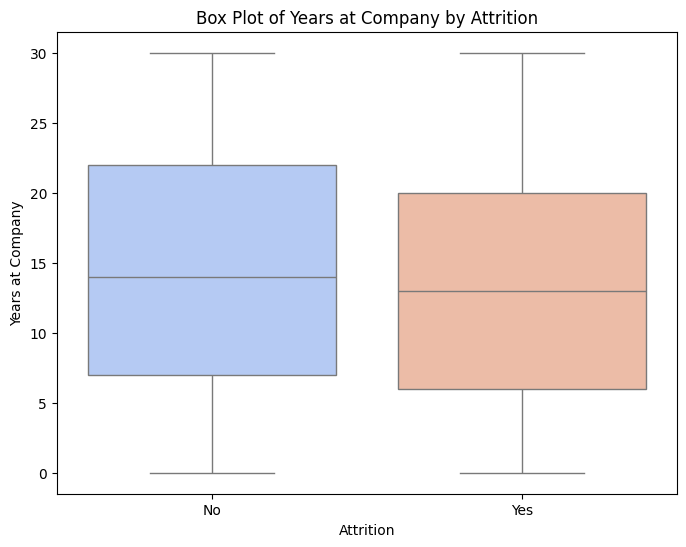

In [30]:
# Box plot for Years at Company by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='Years at Company', palette='coolwarm')
plt.title('Box Plot of Years at Company by Attrition')
plt.show()



C:\Users\etiem\AppData\Local\Temp\ipykernel_21264\646838052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='Number of Promotions', palette='coolwarm')


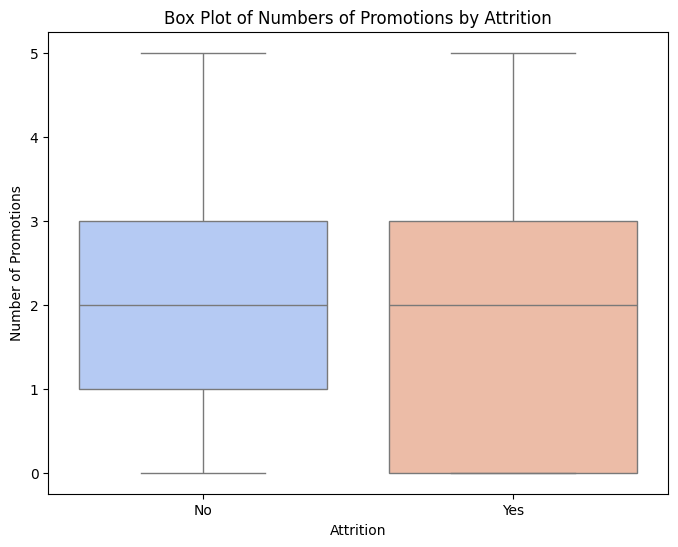

In [32]:
# Box plot for Number of Promotions by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='Number of Promotions', palette='coolwarm')
plt.title('Box Plot of Numbers of Promotions by Attrition')
plt.show()

In [35]:
data.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


In [36]:
data['Distance_Satisfaction_Interaction'] = data['Distance from Office'] * data['Job Satisfaction']


In [42]:
data['Satisfaction_Binned'] = pd.cut(data['Job Satisfaction'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'])


In [43]:
data.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition,Distance_Satisfaction_Interaction,Promotions_Satisfaction_Interaction,Satisfaction_Binned
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No,371.768888,9,High
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes,357.865631,32,High
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No,18.646876,4,Low
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No,126.326784,8,High
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No,247.435076,12,Medium


In [38]:
data['Promotions_Satisfaction_Interaction'] = data['Number of Promotions'] * data['Job Satisfaction']

C:\Users\etiem\AppData\Local\Temp\ipykernel_21264\62995453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='Promotions_Satisfaction_Interaction', palette='coolwarm')


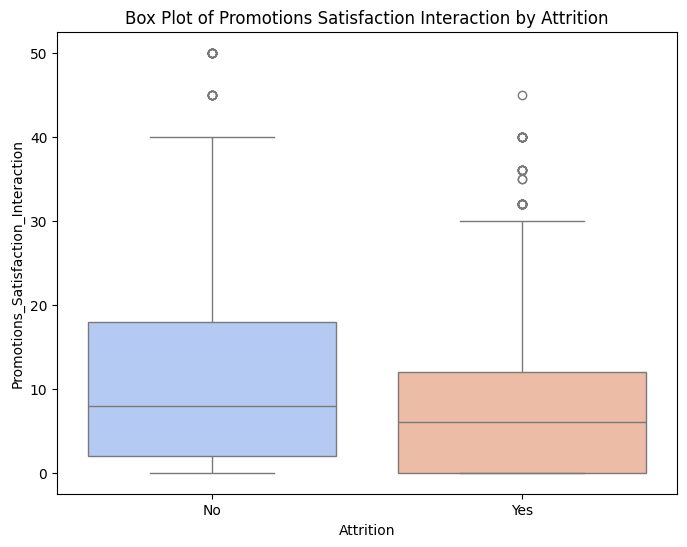

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='Promotions_Satisfaction_Interaction', palette='coolwarm')
plt.title('Box Plot of Promotions Satisfaction Interaction by Attrition')
plt.show()

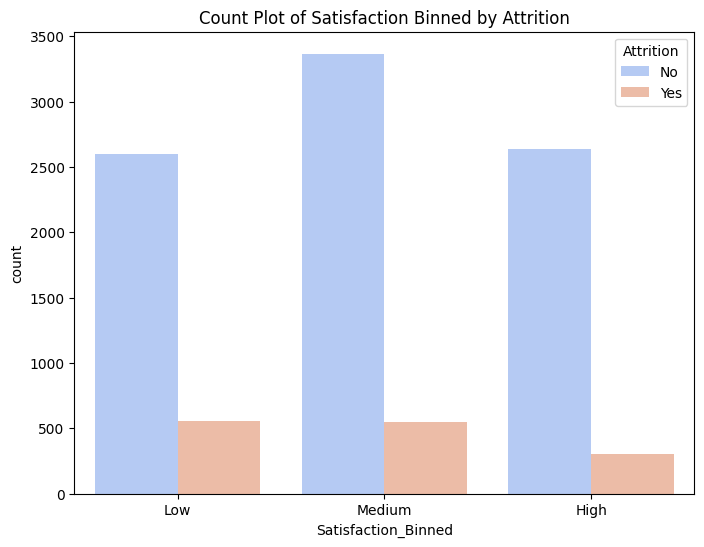

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Satisfaction_Binned', hue='Attrition', palette='coolwarm')
plt.title('Count Plot of Satisfaction Binned by Attrition')
plt.show()
# Countplot for catergiocal data

##Modeling?

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Employee ID                          10000 non-null  int64   
 1   Age                                  10000 non-null  int64   
 2   Gender                               10000 non-null  object  
 3   Job Role                             10000 non-null  object  
 4   Department                           10000 non-null  object  
 5   Monthly Income                       10000 non-null  int64   
 6   Years at Company                     10000 non-null  int64   
 7   Number of Promotions                 10000 non-null  int64   
 8   Last Raise Percentage                10000 non-null  float64 
 9   Distance from Office                 10000 non-null  float64 
 10  Job Satisfaction                     10000 non-null  int64   
 11  Performance Rati

In [48]:
# build data pipeline

# create data pipeline for logistic regression
catFeatures = ['Satisfaction_Binned '] 
numFeatures = ['Promotions_Satisfaction_Interaction', 'Distance_Satisfaction_Interaction ', 'Last Raise Percentage ', 'Years at Company', 'Monthly Income ']
target = ['Attrition']

# train and test set
x_train, x_test, y_train, y_test = train_test_split(data[catFeatures + numFeatures], data[target], test_size=0.3, random_state=1)

# build pipeline, transformers
# apply one hot encoding, scaling
# prevent one hot encoder from returning a sparse matrix (GuassianNB will throw an error otherwise)
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

# build preprocessor
preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, catFeatures), ('num', numTransformer, numFeatures)])

KeyError: "['Satisfaction_Binned ', 'Distance_Satisfaction_Interaction ', 'Last Raise Percentage ', 'Monthly Income '] not in index"

In [57]:
# Convert 'Attrition' column to binary
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

In [58]:
# Define features and target
catFeatures = ['Satisfaction_Binned'] 
numFeatures = ['Promotions_Satisfaction_Interaction', 'Distance_Satisfaction_Interaction', 'Last Raise Percentage', 'Years at Company', 'Monthly Income']
target = 'Attrition'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[catFeatures + numFeatures], data[target], test_size=0.3, random_state=42)

# Build transformers for the pipeline
catTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
numTransformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Build preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', catTransformer, catFeatures),
    ('num', numTransformer, numFeatures)
])


In [60]:
# Create and train the pipeline with Logistic Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.856
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[2568    0]
 [ 432    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      2568
           1       0.00      0.00      0.00       432

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.73      0.86      0.79      3000



C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

Accuracy: 0.5533333333333333
Precision: 0.19365721997300944
Recall: 0.6643518518518519
F1 Score: 0.2998955067920585
Confusion Matrix:
 [[1373 1195]
 [ 145  287]]
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.53      0.67      2568
         Yes       0.19      0.66      0.30       432

    accuracy                           0.55      3000
   macro avg       0.55      0.60      0.49      3000
weighted avg       0.80      0.55      0.62      3000



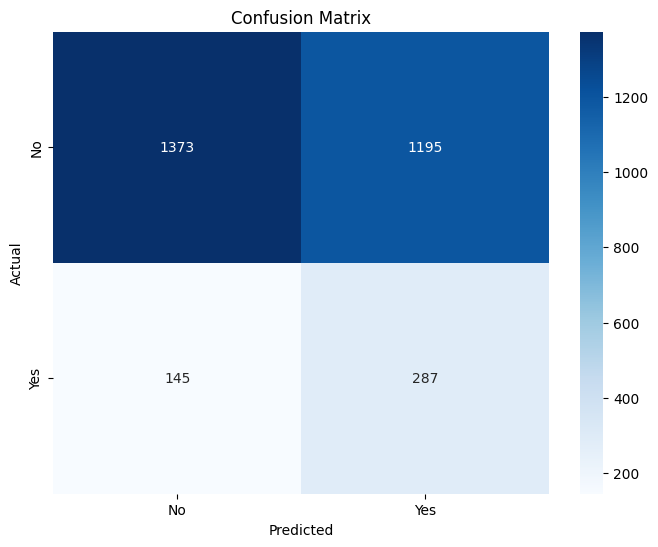

In [56]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
classes = np.array(['No', 'Yes'])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=data[target].values.ravel())
class_weight_dict = {'No': class_weights[0], 'Yes': class_weights[1]}

# Update the model pipeline with class weights
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight=class_weight_dict))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


KNN

In [62]:
# Create the KNN model
knn = KNeighborsClassifier()

In [61]:
# build our pipeline
pipeline = Pipeline(steps=
                    [
                        ('preprocessor',preprocessor),
                        ('classifier',KNeighborsClassifier())
                    ])

In [63]:
# use GRID SEARCH to find the best combination of hyperparameters for our problem
param_grid = {
    'classifier__n_neighbors':[5,7,9,15,35,45,55],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['euclidean','manhattan','minkowski']
}

In [64]:
# let's perform gridsearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Satisfaction_Binned']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Promotions_Satisfaction_Interaction',
                                                                          'Distance_Satisfaction_Interaction',
                                                                          'Last '
                                                                          'Raise '
                                                                          'Percentage',
                                                                          'Years '
                                                                          'at '
                                                                          'Company',
                                                                          'Monthly '
                                                                          'Income'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan',
                                                'minkowski'],
                         'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [65]:
# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

In [68]:
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Satisfaction_Binned']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Promotions_Satisfaction_Interaction',
                                                                          'Distance_Satisfaction_Interaction',
                                                                          'Last '
                                                                          'Raise '
                                                                          'Percentage',
                                                                          'Years '
                                                                          'at '
                                                                          'Company',
                                                                          'Monthly '
                                                                          'Income'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1')

In [69]:
final_classifier = KNeighborsClassifier(n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
                                        metric = grid_search.best_params_['classifier__metric'],
                                        weights = grid_search.best_params_['classifier__weights']
                                        )

In [70]:
final_pipeline = Pipeline(steps=
                          [
                              ('preprocessor',preprocessor),
                              ('classifier',final_classifier)
                          ])

In [71]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Satisfaction_Binned']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Promotions_Satisfaction_Interaction',
                                                   'Distance_Satisfaction_Interaction',
                                                   'Last Raise Percentage',
                                                   'Years at Company',
                                                   'Monthly Income'])])),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

In [74]:
# Make predictions on the test set
y_pred = final_pipeline.predict(X_test)

In [75]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.816
Precision: 0.1875
Recall: 0.08333333333333333
F1 Score: 0.11538461538461539
Confusion Matrix:
 [[2412  156]
 [ 396   36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2568
           1       0.19      0.08      0.12       432

    accuracy                           0.82      3000
   macro avg       0.52      0.51      0.51      3000
weighted avg       0.76      0.82      0.78      3000

